In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
np.random.seed(1)
m = 500
x1 = 5 * np.random.rand(m, 1) -3
y = 10 + (2 * x1) + x1**2 + 2 * x1**3 + 10 * np.random.randn(m, 1)

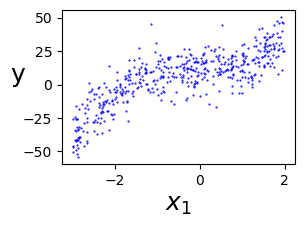

In [39]:
plt.figure(figsize=(3,2))
plt.plot(x1, y, 'b.', markersize=1)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

x1Train, x1Test, yTrain, yTest = train_test_split(x1, y, test_size=0.2, random_state=1)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [42]:
pipReg = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scal', StandardScaler()),
    ('sgd', SGDRegressor(penalty='elasticnet',random_state=1))
])

In [43]:
#Using Grid Search

from sklearn.model_selection import GridSearchCV

In [44]:
paramGrid = [{
    'poly__degree': [2, 3, 4],
    'sgd__alpha': [0.1, 1, 10],
    'sgd__l1_ratio': [0, 0.5, 1]
}]

In [45]:
gridSearch = GridSearchCV(pipReg, paramGrid, scoring='r2', return_train_score=True, cv=3)

gridSearch.fit(x1Train, yTrain.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scal', StandardScaler()),
                                       ('sgd',
                                        SGDRegressor(penalty='elasticnet',
                                                     random_state=1))]),
             param_grid=[{'poly__degree': [2, 3, 4], 'sgd__alpha': [0.1, 1, 10],
                          'sgd__l1_ratio': [0, 0.5, 1]}],
             return_train_score=True, scoring='r2')

In [46]:
gridSearch.best_score_

0.7329379166794469

In [47]:
gridSearch.best_params_

{'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 1}

In [48]:
gridModel = gridSearch.best_estimator_

gridModel.score(x1Test, yTest)

0.7287417714648952

In [49]:
gridRlt = gridSearch.cv_results_
for meanScore, params in zip(gridRlt['mean_test_score'],
                             gridRlt['params']):
    print(meanScore, params)

0.6709144714185259 {'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0}
0.6729631263131383 {'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0.5}
0.6739838341338239 {'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 1}
0.5604173544087145 {'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_ratio': 0}
0.6191871577349027 {'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_ratio': 0.5}
0.6703784468578063 {'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_ratio': 1}
0.14710596880018803 {'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1_ratio': 0}
0.17066184581085764 {'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1_ratio': 0.5}
0.35965297018820436 {'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1_ratio': 1}
0.724812436785547 {'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0}
0.7292732003307676 {'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0.5}
0.7329379166794469 {'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 1}
0.6498673294136279 {'poly__degree': 3, 'sgd__alpha': 1, 'sgd__l

In [50]:
#搜尋結果列表

import pandas as pd

pd.DataFrame(gridSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,param_sgd__alpha,param_sgd__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.007386,0.003806,0.001680,0.000645,2,0.1,0,"{'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l...",0.681827,0.620079,0.710837,0.670914,0.037847,13,0.677307,0.708229,0.655283,0.680273,0.021717
1,0.006395,0.004059,0.004369,0.002407,2,0.1,0.5,"{'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l...",0.685450,0.619078,0.714362,0.672963,0.039889,12,0.679451,0.710540,0.657430,0.682474,0.021787
2,0.004984,0.001595,0.001130,0.000103,2,0.1,1,"{'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l...",0.688785,0.616186,0.716980,0.673984,0.042459,11,0.680708,0.711576,0.658440,0.683575,0.021787
3,0.002864,0.000407,0.001311,0.000249,2,1,0,"{'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_...",0.557087,0.541118,0.583047,0.560417,0.017278,18,0.567911,0.600991,0.548605,0.572502,0.021632
4,0.002983,0.000532,0.001012,0.000156,2,1,0.5,"{'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_...",0.623108,0.588549,0.645905,0.619187,0.023579,17,0.628831,0.657883,0.602874,0.629863,0.022469
5,0.002816,0.000201,0.001082,0.000180,2,1,1,"{'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_...",0.682686,0.618728,0.709721,0.670378,0.038153,14,0.677798,0.709030,0.654674,0.680501,0.022273
6,0.002446,0.000341,0.001325,0.000348,2,10,0,"{'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1...",0.134789,0.179652,0.126876,0.147106,0.023239,27,0.160548,0.201993,0.153779,0.172107,0.021313
7,0.002680,0.000665,0.001181,0.000155,2,10,0.5,"{'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1...",0.157878,0.208528,0.145580,0.170662,0.027242,26,0.183041,0.232322,0.171025,0.195463,0.026521
8,0.003013,0.000493,0.001128,0.000131,2,10,1,"{'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1...",0.360628,0.406270,0.312062,0.359653,0.038466,21,0.377901,0.438099,0.328350,0.381450,0.044875
9,0.003367,0.000287,0.001360,0.000536,3,0.1,0,"{'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l...",0.735321,0.667060,0.772056,0.724812,0.043504,8,0.734500,0.764145,0.705448,0.734697,0.023963


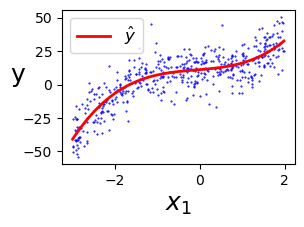

In [51]:
plt.figure(figsize=(3,2))

x1s = np.linspace(x1.min(),x1.max(),100).reshape(-1,1)
yPred = gridModel.predict(x1s)

plt.plot(x1, y, 'b.', markersize=1)
plt.plot(x1s, yPred, 'r-', linewidth=2, label='$\hat y$')

plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=12)

plt.show()

In [52]:
#Random Search

from sklearn.model_selection import RandomizedSearchCV

paramRnd = [{
    'poly__degree': range(1,11,1),
    'sgd__alpha': np.random.rand(100),
    'sgd__l1_ratio': np.random.rand(100)
}]

In [53]:
rndSearch = RandomizedSearchCV(pipReg, param_distributions=paramRnd, n_iter=10, cv=3, scoring='r2', random_state=1)

rndSearch.fit(x1Train, yTrain.ravel())

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('scal', StandardScaler()),
                                             ('sgd',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=1))]),
                   param_distributions=[{'poly__degree': range(1, 11),
                                         'sgd__alpha': array([0.72130334, 0.44034709, 0.12673571, 0.58982365, 0.03606831,
       0.20018212, 0.78830119, 0.01209676, 0.3033456...
       1.84982966e-01, 8.44260005e-01, 9.82589789e-01, 9.13739625e-01,
       3.47369420e-01, 7.80224580e-01, 5.46454591e-01, 8.16442398e-01,
       4.83726951e-01, 5.89951298e-01, 7.87263448e-01, 1.00234643e-01,
       5.37007117e-01, 3.65983347e-01, 6.04306844e-01, 9.58802516e-01,
       3.92822945e-01, 3.92972998e-01, 7.90636994e-01, 6.45078399e-01,
       3.93884008e-01, 6.88955048e-01, 4.04001609e-01, 1.36113154e-01])}],
                   random_state=1, scoring='r2')

In [54]:
rndSearch.best_score_

0.7296834716153899

In [56]:
rndSearch.best_params_

{'sgd__l1_ratio': 0.9247408135383717,
 'sgd__alpha': 0.151375569992799,
 'poly__degree': 10}

In [57]:
rndModel = rndSearch.best_estimator_

rndModel.score(x1Test, yTest)

0.7200654565989044

In [59]:
rndRlt = rndSearch.cv_results_
for meanScore, params in zip(rndRlt['mean_test_score'],
                             rndRlt['params']):
    print(meanScore, params)

0.7296834716153899 {'sgd__l1_ratio': 0.9247408135383717, 'sgd__alpha': 0.151375569992799, 'poly__degree': 10}
0.7047624269309748 {'sgd__l1_ratio': 0.3948822625368005, 'sgd__alpha': 0.6830743663365642, 'poly__degree': 8}
0.6016866738089531 {'sgd__l1_ratio': 0.39282294499696246, 'sgd__alpha': 0.3734071317371953, 'poly__degree': 1}
0.683140200789267 {'sgd__l1_ratio': 0.19086994317230743, 'sgd__alpha': 0.8785878632047704, 'poly__degree': 10}
0.7245078307345749 {'sgd__l1_ratio': 0.8805385975643267, 'sgd__alpha': 0.7213033441865708, 'poly__degree': 6}
0.723177968321603 {'sgd__l1_ratio': 0.8369977822135122, 'sgd__alpha': 0.7043133983839096, 'poly__degree': 8}
0.7065412580554392 {'sgd__l1_ratio': 0.38698923425629217, 'sgd__alpha': 0.5071194235482045, 'poly__degree': 3}
0.7124785922478898 {'sgd__l1_ratio': 0.11819262934703845, 'sgd__alpha': 0.34433919545005387, 'poly__degree': 10}
0.6948355706554746 {'sgd__l1_ratio': 0.46157971096238615, 'sgd__alpha': 0.7883011896679689, 'poly__degree': 3}
0.70